# Daily Exchange Rates per INR 1999-2022

### Importing Libraries

In [41]:
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns


### Loading the Dataset

In [52]:
df = pd.read_csv("C:\\Users\\lenovo\\Downloads\\UNZIP_FOR_NOTEBOOKS\\Euro exchange rates.csv",  parse_dates=["Period\\Unit:"])
df.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2022-11-15,1.5415,1.9558,5.5480,1.3816,0.9790,7.3299,NaN,24.326,7.4388,...,4.9116,NaN,10.8081,1.4238,NaN,NaN,36.9390,19.3608,1.0404,17.8822
1,2022-11-14,1.5427,1.9558,5.4605,1.3706,0.9751,7.2906,NaN,24.289,7.4382,...,4.9043,NaN,10.7713,1.4177,NaN,NaN,36.9780,19.1923,1.0319,17.8393
2,2022-11-11,1.5459,1.9558,5.5147,1.3698,0.9844,7.3267,NaN,24.278,7.4384,...,4.8940,NaN,10.7241,1.4199,NaN,NaN,37.0880,19.0987,1.0308,17.7944
3,2022-11-10,1.5525,1.9558,5.2860,1.3467,0.9834,7.2184,NaN,24.361,7.4381,...,4.8913,NaN,10.8743,1.3963,NaN,NaN,36.7000,18.5100,0.9954,17.6882
4,2022-11-09,1.5538,1.9558,5.1947,1.3501,0.9880,7.2813,NaN,24.337,7.4382,...,4.9045,NaN,10.8450,1.4061,NaN,NaN,36.9990,18.6728,1.0039,17.8770


### Data Cleaning

#### Rename Columns and Change data types


In [53]:
names = str.maketrans('', '', '[]')
df.columns = df.columns.str.translate(names)
df.columns = df.columns.str.strip()
df.set_index('Period\\Unit:', inplace=True)
df.index.rename('DateSeries', inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6177 entries, 2022-11-15 to 1999-01-04
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Australian dollar      6177 non-null   object 
 1   Bulgarian lev          5775 non-null   object 
 2   Brazilian real         5909 non-null   object 
 3   Canadian dollar        6177 non-null   object 
 4   Swiss franc            6177 non-null   object 
 5   Chinese yuan renminbi  5909 non-null   object 
 6   Cypriot pound          2346 non-null   object 
 7   Czech koruna           6177 non-null   object 
 8   Danish krone           6177 non-null   object 
 9   Estonian kroon         3130 non-null   object 
 10  UK pound sterling      6177 non-null   object 
 11  Greek drachma          520 non-null    object 
 12  Hong Kong dollar       6177 non-null   object 
 13  Croatian kuna          5909 non-null   object 
 14  Hungarian forint       6177 non-null  

In [54]:
cols = list(df)
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
df_cur.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6177 entries, 2022-11-15 to 1999-01-04
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Australian dollar      6177 non-null   object 
 1   Bulgarian lev          5775 non-null   object 
 2   Brazilian real         5909 non-null   object 
 3   Canadian dollar        6177 non-null   object 
 4   Swiss franc            6177 non-null   object 
 5   Chinese yuan renminbi  5909 non-null   object 
 6   Cypriot pound          2346 non-null   object 
 7   Czech koruna           6177 non-null   object 
 8   Danish krone           6177 non-null   object 
 9   Estonian kroon         3130 non-null   object 
 10  UK pound sterling      6177 non-null   object 
 11  Greek drachma          520 non-null    object 
 12  Hong Kong dollar       6177 non-null   object 
 13  Croatian kuna          5909 non-null   object 
 14  Hungarian forint       6177 non-null  

### Removing NaN Values

In [46]:
df.isnull().sum(axis = 0)

Australian dollar          62
Bulgarian lev             460
Brazilian real            329
Canadian dollar            62
Swiss franc                62
Chinese yuan renminbi     329
Cypriot pound            3873
Czech koruna               62
Danish krone               62
Estonian kroon           3103
UK pound sterling          62
Greek drachma            5663
Hong Kong dollar           62
Croatian kuna             329
Hungarian forint           62
Indonesian rupiah          62
Israeli shekel            330
Indian rupee              329
Iceland krona            2407
Japanese yen               62
Korean won                 62
Lithuanian litas         2080
Latvian lats             2335
Maltese lira             3873
Mexican peso               62
Malaysian ringgit          62
Norwegian krone            62
New Zealand dollar         62
Philippine peso            62
Polish zloty               62
Romanian leu               62
Russian rouble            245
Swedish krona              62
Singapore 

In [55]:
n = df.index[df.isnull().all(1)]
print(n)
print('Number of NaN rows: {}'.format(len(n)))

DatetimeIndex(['2012-05-01', '2012-04-09', '2012-04-06', '2011-12-26',
               '2011-04-25', '2011-04-22', '2010-04-05', '2010-04-02',
               '2010-01-01', '2009-12-25', '2009-05-01', '2009-04-13',
               '2009-04-10', '2009-01-01', '2008-12-26', '2008-12-25',
               '2008-05-01', '2008-03-24', '2008-03-21', '2008-01-01',
               '2007-12-26', '2007-12-25', '2007-05-01', '2007-04-09',
               '2007-04-06', '2007-01-01', '2006-12-26', '2006-12-25',
               '2006-05-01', '2006-04-17', '2006-04-14', '2005-12-26',
               '2005-03-28', '2005-03-25', '2004-04-12', '2004-04-09',
               '2004-01-01', '2003-12-26', '2003-12-25', '2003-05-01',
               '2003-04-21', '2003-04-18', '2003-01-01', '2002-12-26',
               '2002-12-25', '2002-05-01', '2002-04-01', '2002-03-29',
               '2002-01-01', '2001-12-31', '2001-12-26', '2001-12-25',
               '2001-05-01', '2001-04-16', '2001-04-13', '2001-01-01',
      

In [56]:
df= df.drop(n)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6115 entries, 2022-11-15 to 1999-01-04
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Australian dollar      6115 non-null   float64
 1   Bulgarian lev          5717 non-null   float64
 2   Brazilian real         5848 non-null   float64
 3   Canadian dollar        6115 non-null   float64
 4   Swiss franc            6115 non-null   float64
 5   Chinese yuan renminbi  5848 non-null   float64
 6   Cypriot pound          2304 non-null   float64
 7   Czech koruna           6115 non-null   float64
 8   Danish krone           6115 non-null   float64
 9   Estonian kroon         3074 non-null   float64
 10  UK pound sterling      6115 non-null   float64
 11  Greek drachma          514 non-null    float64
 12  Hong Kong dollar       6115 non-null   float64
 13  Croatian kuna          5848 non-null   float64
 14  Hungarian forint       6115 non-null  

In [58]:
df.describe(include='all')


,Australian dollar,Bulgarian lev,Brazilian real,Canadian dollar,Swiss franc,Chinese yuan renminbi,Cypriot pound,Czech koruna,Danish krone,Estonian kroon,...,Romanian leu,Russian rouble,Swedish krona,Singapore dollar,Slovenian tolar,Slovak koruna,Thai baht,Turkish lira,US dollar,South African rand
count,6115.000000,5717.000000,5848.000000,6115.000000,6115.000000,5848.000000,2304.000000,6115.000000,6115.000000,3.074000e+03,...,6115.000000,5932.000000,6115.000000,6115.000000,2049.000000,2560.000000,6115.000000,6115.000000,6115.000000,6115.000000
mean,1.576872,1.954586,3.397652,1.465931,1.335918,8.503604,0.578354,28.167202,7.448088,1.564660e+01,...,3.950769,48.238010,9.472731,1.745340,224.630090,39.512409,41.696156,3.544947,1.193579,11.850627
std,0.150307,0.002975,1.206634,0.098318,0.214925,1.168333,0.004393,3.532062,0.011373,3.375627e-14,...,0.875509,19.627868,0.658521,0.215524,16.102436,4.154182,4.746896,3.588387,0.158717,3.757882
min,1.163900,1.944100,1.563000,1.213900,0.943700,6.555200,0.570970,22.968000,7.423400,1.564660e+01,...,1.291200,23.190300,8.055000,1.383800,187.133300,30.126000,33.204000,0.370100,0.825200,6.078500
25%,1.479250,1.955800,2.565200,1.396400,1.113500,7.616725,0.574580,25.585000,7.438700,1.564660e+01,...,3.541350,34.466000,9.063300,1.571700,213.493900,37.474500,38.018000,1.718600,1.095250,8.697700
50%,1.596500,1.955800,3.079550,1.464700,1.303000,8.104050,0.577800,27.024000,7.447300,1.564660e+01,...,4.265200,40.189950,9.293000,1.667700,230.305000,40.910000,40.378000,2.189200,1.188800,11.008700
75%,1.670200,1.955800,3.906800,1.539600,1.545150,9.541575,0.582000,30.268000,7.458300,1.564660e+01,...,4.534500,68.905300,9.984600,1.975550,239.510000,42.769750,45.284500,3.627450,1.311850,15.151200
max,2.073500,1.962000,6.955300,1.812300,1.680300,11.284000,0.588800,38.583000,7.473200,1.564660e+01,...,4.951000,117.201000,11.713500,2.232300,240.030000,47.484000,53.536000,20.043400,1.599000,20.845200


#### Change the structure of dataframe:
#### reset index and make 2 columns: one with all the currency types: Currency name and another with Value attribute.

In [70]:
df1 = df.reset_index()
df2=df1.melt(id_vars=['DateSeries'], var_name='Currency name', value_name='Value')
df2.head(5)

,DateSeries,Currency name,Value
0,2022-11-15,Australian dollar,1.5415
1,2022-11-14,Australian dollar,1.5427
2,2022-11-11,Australian dollar,1.5459
3,2022-11-10,Australian dollar,1.5525
4,2022-11-09,Australian dollar,1.5538


### Example: USD/INR and INR/USD
Create new dataframe 'dataINRUSD' containig only values of US dollar and Indian rupee INR get 5 sample rows;
Plot the graph including both currencies in rates of INR.

In [71]:
dataINRUSD = df2.loc[(df2['Currency name'] == 'Indian rupee') | (df2['Currency name'] == 'US dollar')]
dataINRUSD.sample(5)

,DateSeries,Currency name,Value
237681,2002-02-20,US dollar,0.8743
106506,2012-11-26,Indian rupee,72.1120
236906,2005-03-01,US dollar,1.3216
109930,1999-07-16,Indian rupee,NaN
237353,2003-06-06,US dollar,1.1813


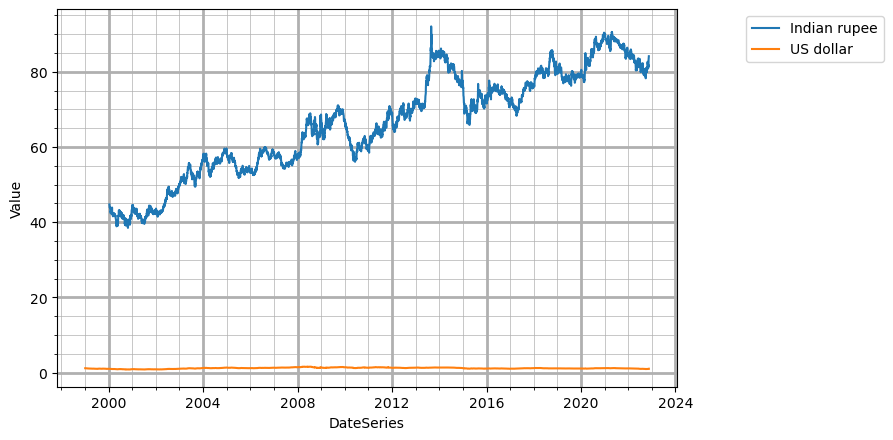

In [91]:
plt.figure(figsize= (8,5), dpi = 100)
plt.grid(which='major', linewidth = 2)
plt.minorticks_on()
sns.lineplot(x='DateSeries', y='Value', hue='Currency name', data = dataINRUSD)
plt.grid(which='minor', linewidth = 0.5)
plt.legend(bbox_to_anchor=(1.1, 1), loc=('upper left'))

### Graphs for 2020 - 2022

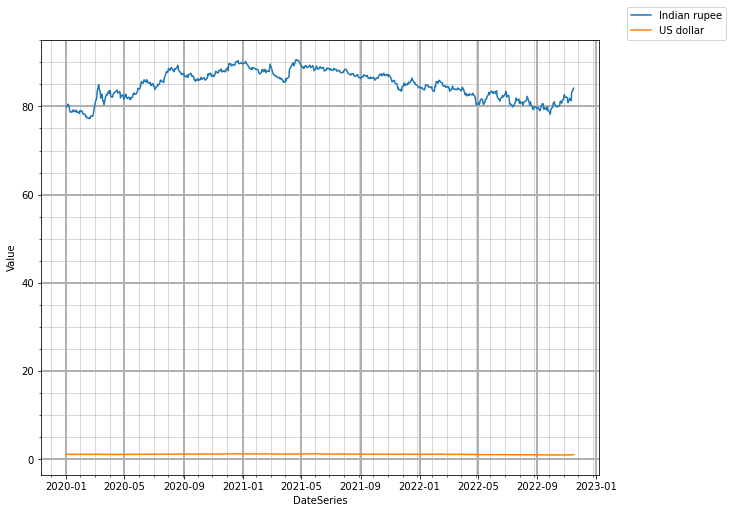

In [96]:
dataSince2020 = dataINRUSD.loc[dataINRUSD['DateSeries'] >= ' 20200101']

fig = plt.figure(figsize=(10,8)) 
plt.grid(which='major', linewidth = 2)
plt.minorticks_on()
plt.grid(which='minor', linewidth = 0.5)
sns.lineplot(x='DateSeries', y='Value', hue='Currency name', data = dataSince2020)
plt.legend(bbox_to_anchor=(1.05, 1), loc=(1.02, 0.7) , borderaxespad=0.);

### All time high of USD - INR exchange

In [127]:
dataUSD = dataINRUSD.loc[(dataINRUSD['Currency name'] == 'US dollar')]
dataUSD['Value'].nlargest()

236044    1.5990
236102    1.5940
236103    1.5931
236107    1.5928
236039    1.5919
Name: Value, dtype: float64

### All time low of USD - INR exchange

In [126]:
dataUSD = dataINRUSD.loc[(dataINRUSD['Currency name'] == 'US dollar')]
dataUSD['Value'].nsmallest()

238015    0.8252
238016    0.8307
238014    0.8324
238018    0.8377
237840    0.8384
Name: Value, dtype: float64

### All time high of INR - USD exchange

In [128]:
dataINR = dataINRUSD.loc[(dataINRUSD['Currency name'] == 'Indian rupee')]
dataINR['Value'].nlargest()

106315    92.0650
104362    90.5955
104363    90.5480
104360    90.4715
104444    90.3975
Name: Value, dtype: float64

### All time low of INR - USD exchange

In [129]:
dataINR = dataINRUSD.loc[(dataINRUSD['Currency name'] == 'Indian rupee')]
dataINR['Value'].nsmallest()

109600    38.497
109601    38.755
109603    38.880
109726    38.903
109599    38.927
Name: Value, dtype: float64

## Conclusion
BY SEEING ABOVE PLOTS AND  ANALYSIS, WE CAN VIEW IT CLEARLY THAT HOW USD HAS BEEN STABLE THROUGH THE OUT THE YEARS IN COMPARISION OF INR.
WHICH MAKES USD ONE OF THE STABLE CURRENCY IN THE WORLD.